# Demonstration 2: Redistricting Data Operations

To address the challenge of both obtaining redistricting data as well as performing relevant calculations data, this demo will perform these
operations by first obtaining data from .shp and .csv files from Redistricting Data Hub, then using these to determine the following measures:

1. Polsby-Popper Score, a metric used to determine the compactness of a district
2. The Efficiency Gap, a metric used to determine partisanship based on wasted votes
3. The Minority-Effectivess, a metric used to determine whether a district is considered to give an appropriate chance for minority voters

For demonstration purposes, we will just be using the county-level data. However, our actual algorithm will likely go into a finer geographical level, such as census blocks and/or groups

First, we import `geopandas`, which is used for the shapefile. Then, we import `pandas`, which is for the .csv file.

We then translate the the race-by-county shape file to a usable dataframe using geopandas

In [11]:
import geopandas as gpd
import pandas as pd

shape_file = "az_race_2022_cnty.zip"

geo_data = gpd.read_file(shape_file)

geo_data.head(3)



,GEOID,STATEFP,STATE,COUNTYFP,COUNTY,TOT_POP22,NHSP_POP22,HSP_POP22,WHT_NHSP22,BLK_NHSP22,...,ASN_NHSP22,HPI_NHSP22,OTH_NHSP22,2OM_NHSP22,BLK_ALL22,AIA_ALL22,ASN_ALL22,HPI_ALL22,OTH_ALL22,geometry
0,04027,04,Arizona,027,Yuma County,204374,70993,133381,59640,3159,...,2199,73,360,3909,6435,5637,3734,527,72126,"POLYGON ((-114.81406 32.56334, -114.81405 32.5..."
1,04021,04,Arizona,021,Pinal County,433338,297992,135346,237577,18929,...,6423,1462,1359,15604,28434,28769,11931,3440,66965,"POLYGON ((-111.26687 32.50162, -111.27030 32.5..."
2,04017,04,Arizona,017,Navajo County,107110,94382,12728,44883,1008,...,394,152,150,3204,2479,48854,1108,531,5854,"POLYGON ((-110.00067 35.84427, -110.00067 35.8..."


Now, we use pandas to translate the voting data by county into a dataframe

In [3]:
csv_file = "AZ_l2_2022stats_county.csv"
voting_data = pd.read_csv(csv_file)

voting_data

,countyfips,countyname,total_reg,age_18_19,age_20_24,age_25_29,age_30_34,age_35_44,age_45_54,age_55_64,...,pp20200317_pct_voted_aa,pp20200317_voted_esa,pp20200317_reg_esa,pp20200317_pct_voted_esa,pp20200317_voted_oth,pp20200317_reg_oth,pp20200317_pct_voted_oth,pp20200317_voted_unk,pp20200317_reg_unk,pp20200317_pct_voted_unk
0,4007,GILA,34159,127,1532,1742,1917,3603,3828,6197,...,0.1321,26,233,0.1116,79,506,0.1561,288,2768,0.1040
1,4009,GRAHAM,19661,162,1860,1752,1754,3217,3037,2816,...,0.0571,13,122,0.1066,23,206,0.1117,92,1319,0.0697
2,4012,LA PAZ,11083,45,514,581,629,1136,1199,2045,...,0.0000,3,56,0.0536,11,119,0.0924,43,821,0.0524
3,4013,MARICOPA,2513071,21499,208763,227875,219622,384092,378158,406633,...,0.2757,7716,56980,0.1354,7599,50931,0.1492,30353,193500,0.1569
4,4015,MOHAVE,140030,573,6559,7441,7947,15050,16059,26421,...,0.1292,65,922,0.0705,90,1334,0.0675,682,9732,0.0701
5,4017,NAVAJO,69676,402,4477,4704,5299,10428,9812,12323,...,0.1674,117,678,0.1726,746,4077,0.1830,1187,9665,0.1228
6,4021,PINAL,254885,1703,17257,19298,20669,39346,36799,39692,...,0.2353,199,2150,0.0926,322,2717,0.1185,1937,17458,0.1110
7,4025,YAVAPAI,169045,777,7451,7943,8349,16634,17774,29962,...,0.2230,206,1329,0.1550,220,1745,0.1261,1967,13666,0.1439
8,4027,YUMA,105509,933,9715,10606,10212,16560,13650,15212,...,0.1722,73,784,0.0931,81,694,0.1167,341,3863,0.0883
9,4001,APACHE,51862,324,3379,4029,4718,8675,7750,8955,...,0.0830,111,698,0.1590,1088,5659,0.1923,1139,9647,0.1181


Now that we have this, it's time to merge the data. We will do this using the FIPS county codes

In [4]:
# first, convert the geo data's FIPS code to match the voting data's fips code
for index, row in geo_data.iterrows():
    updated_code = str(row['GEOID']).lstrip('0')
    geo_data.at[index, 'COUNTYFP'] = int(updated_code)

# now we can merge the data using the fips codes
merged_data = geo_data.merge(voting_data, how='inner', left_on='COUNTYFP', right_on='countyfips')


merged_data.head(3)


,GEOID,STATEFP,STATE,COUNTYFP,COUNTY,TOT_POP22,NHSP_POP22,HSP_POP22,WHT_NHSP22,BLK_NHSP22,...,pp20200317_pct_voted_aa,pp20200317_voted_esa,pp20200317_reg_esa,pp20200317_pct_voted_esa,pp20200317_voted_oth,pp20200317_reg_oth,pp20200317_pct_voted_oth,pp20200317_voted_unk,pp20200317_reg_unk,pp20200317_pct_voted_unk
0,04027,04,Arizona,4027,Yuma County,204374,70993,133381,59640,3159,...,0.1722,73,784,0.0931,81,694,0.1167,341,3863,0.0883
1,04021,04,Arizona,4021,Pinal County,433338,297992,135346,237577,18929,...,0.2353,199,2150,0.0926,322,2717,0.1185,1937,17458,0.1110
2,04017,04,Arizona,4017,Navajo County,107110,94382,12728,44883,1008,...,0.1674,117,678,0.1726,746,4077,0.1830,1187,9665,0.1228


Now we can group the counties into simulated "districts". These districts are very impractical but they serve as a good basis for demo purposes

In [ ]:
SAMPLE_DISTRICTS = {
    1: ['YUMA', 'PIMA', 'SANTA CRUZ', 'COCHISE'],
    2: ['MARICOPA', 'GILA', 'PINAL', 'GRAHAM', 'GREENLEE'],
    3: ['MOHAVE', 'YAVAPAI', 'LA PAZ'],
    4: ['COCONINO', 'NAVAJO', 'APACHE']
}

In [26]:
SAMPLE_DISTRICTS_2 = {
    1: ['Yuma County', 'Pima County', 'Santa Cruz County', 'Cochise County'],
    2: ['Maricopa County', 'Gila County', 'Pinal County', 'Graham County', 'Greenlee County'],
    3: ['Mohave County', 'Yavapai County', 'La Paz County'],
    4: ['Coconino County', 'Navajo County', 'Apache County']
}

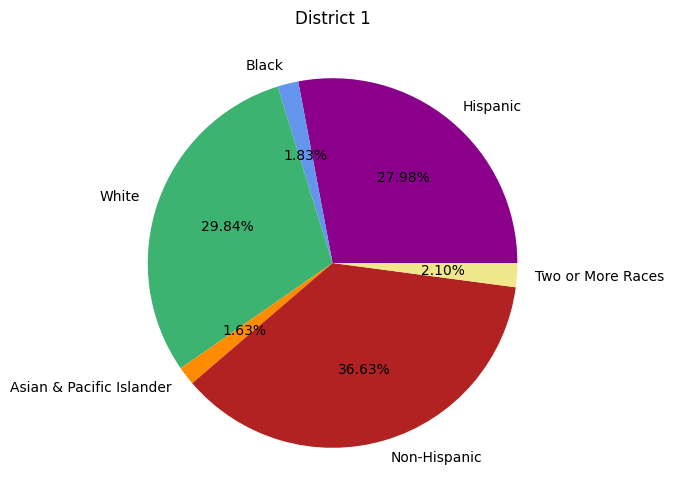

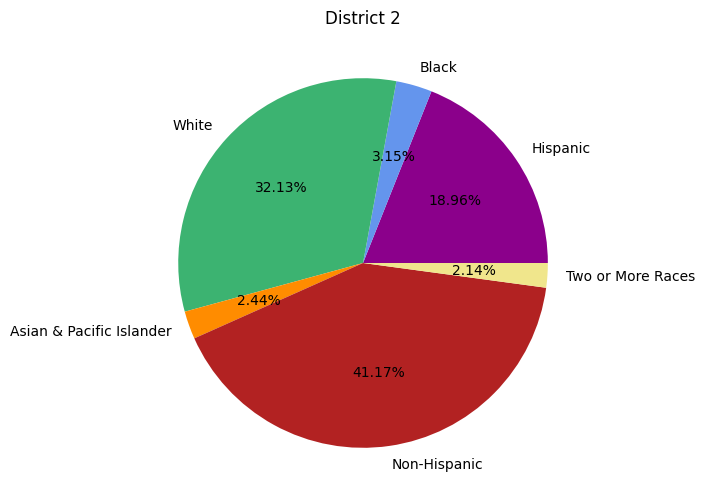

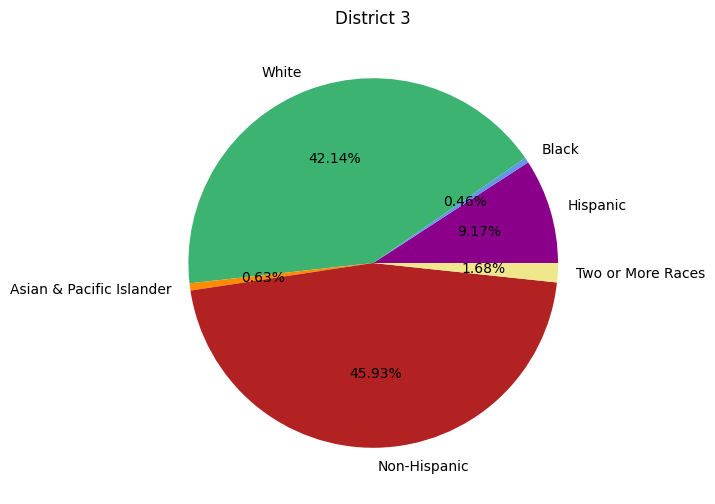

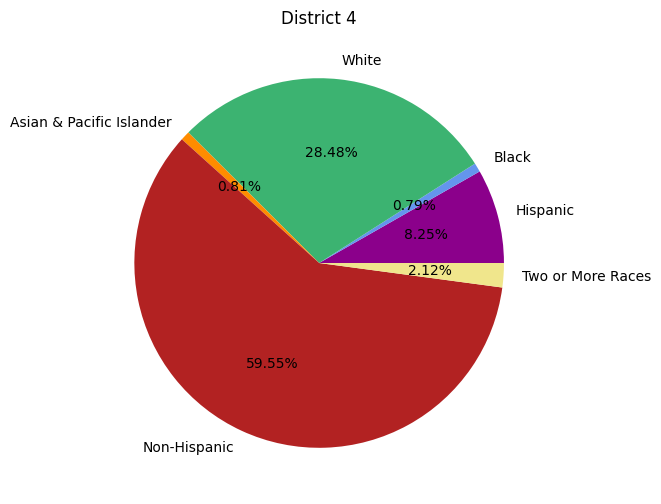

In [27]:
import matplotlib.pyplot as plt

hispanicPercent = 0
whitePercent = 0
blackPercent = 0
asianHawaiianPercent = 0
nonHispanicPercent = 0
twoOrMoreRacesPercent = 0

# loop through the counties in each district
for district, counties in SAMPLE_DISTRICTS_2.items():
    totalHispanicPop = 0
    totalWhitePop = 0
    totalBlackPop = 0
    totalAsianHawaiianPop = 0
    totalNonHispanicPop = 0
    totalTwoOrMorePop = 0
    cummulativeTotalPop = 0

    # loop through the list of counties in that district
    for county in counties:
        # get the hispanic population of the county, add it to the total
        hispanicPop = geo_data.loc[geo_data['COUNTY'] == county, 'HSP_POP22']
        totalHispanicPop += hispanicPop.iloc[0]

        # get the white population of the county, add it to the total
        whitePop = geo_data.loc[geo_data['COUNTY'] == county, 'WHT_NHSP22']
        totalWhitePop += whitePop.iloc[0]

        # get the black population of the county, add it to the total
        blackPop = geo_data.loc[geo_data['COUNTY'] == county, 'BLK_NHSP22']
        totalBlackPop += blackPop.iloc[0]

        # get the asian population of the county, add it to the total
        asianHawaiianPop = geo_data.loc[geo_data['COUNTY'] == county, 'ASN_NHSP22']
        # get the hawaiian population of the county, add it to the total
        hawaiianPop = geo_data.loc[geo_data['COUNTY'] == county, 'HPI_NHSP22']
        totalAsianHawaiianPop += asianHawaiianPop.iloc[0]
        totalAsianHawaiianPop += hawaiianPop.iloc[0]


    # replace this with Native American
        # get the non-hispanic population of the county, add it to the total
        nonHispanicPop = geo_data.loc[geo_data['COUNTY'] == county, 'NHSP_POP22']
        totalNonHispanicPop += nonHispanicPop.iloc[0]

        # get the two or more races population of the county, add it to the total
        twoOrMorePop = geo_data.loc[geo_data['COUNTY'] == county, '2OM_NHSP22']
        totalTwoOrMorePop += twoOrMorePop.iloc[0]

        # get the counties total population, add it to the total
        totalPop = geo_data.loc[geo_data['COUNTY'] == county, 'TOT_POP22']
        cummulativeTotalPop += totalPop.iloc[0]


    # calculate the percentage of each race in the district
    hispanicPercent = totalHispanicPop / cummulativeTotalPop
    whitePercent = totalWhitePop / cummulativeTotalPop
    blackPercent = totalBlackPop / cummulativeTotalPop
    asianHawaiianPercent = totalAsianHawaiianPop / cummulativeTotalPop
    nonHispanicPercent = totalNonHispanicPop / cummulativeTotalPop
    twoOrMoreRacesPercent = totalTwoOrMorePop / cummulativeTotalPop

    # put the percentages into an array, to be used for pie chart
    demographics = [ hispanicPercent, blackPercent, whitePercent, asianHawaiianPercent, nonHispanicPercent, twoOrMoreRacesPercent ]

    # define specifics for the pie chart
    labels = ['Hispanic', 'Black', 'White', 'Asian & Pacific Islander', 'Non-Hispanic', 'Two or More Races']
    title = 'District ' + str(district)
    colors = ['darkmagenta', 'cornflowerblue', 'mediumseagreen', 'darkorange', 'firebrick', 'khaki' ]

    # create a pie chart
    plt.figure( figsize = (6, 6) )
    plt.pie( demographics, labels = labels, colors = colors, autopct = '%1.2f%%' )
    plt.title( title )

    # show the pie chart
    plt.show()


1. Polsby-Popper : measure of compactness
- Need to calculate the area and perimeter of the districts, get a score from that.
2. Efficiency Gap: measure of partisanship
- (Take party's total wasted votes in election - Other party's wasted votes) / total number of votes cast
- to get the wasted votes, take the votes for a party that didn't win
3. Minority effectiveness: measure of minority representation
- Minority effective district = district where the minority group has 40% or more voting population